# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

## Observations and Analysis

### 1.)
The temperature does increase the closer the latitude is to the equator. We can see through both the overall, as well as the northern and southern hemisphere split charts. As the latitude value approaches 0, the temperature becomes consistently higher. This proves the initial hypothesis of the homework to be true in an statistical and easy to digest visual way!

### 2.)
Something that was surprising to me was that humidity % did not have a strong correlation with the latitude. I am unsure why, but I assumed it would at the start of this assignment. But as the graphs show, humidity is not necassarily dictatated by latitude but more likely other factors, perhaps by the amount of water to land mass in an area. This could be why we see such dispersion in our charts.

### 3.)
Both cloudiness and wind speed did not seem to have any correlation with latitude. Wind speed is more a factor of pressure currents which, to my knowledge are not effected by the tilt of the earth. This is likely why temperature is so closely correlated with latitude but the other values tested in this homework are not as much.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

In [2]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
# Returning size of random selection back to original for hw submission
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities)

612
['mar del plata', 'atuona', 'sechura', 'san patricio', 'new norfolk', 'mys shmidta', 'hermanus', 'basar', 'kapaa', 'mogadishu', 'olkhovatka', 'santa isabel do rio negro', 'xining', 'tarudant', 'cagsiay', 'illoqqortoormiut', 'nikolskoye', 'haines junction', 'iracoubo', 'bredasdorp', 'mingguang', 'bluff', 'vanavara', 'rikitea', 'jamestown', 'floro', 'ushuaia', 'ozinki', 'maloshuyka', 'port alfred', 'jalapa', 'east london', 'arraial do cabo', 'makakilo city', 'lata', 'vaini', 'kalmunai', 'flin flon', 'viedma', 'port lincoln', 'san quintin', 'puerto ayora', 'merauke', 'dikson', 'lyuban', 'tarakan', 'itapeva', 'jhajjar', 'norman wells', 'hilo', 'faanui', 'lavrentiya', 'najran', 'metro', 'tiznit', 'eldikan', 'rocha', 'qaanaaq', 'provideniya', 'igrim', 'great yarmouth', 'barentsburg', 'albany', 'bandeirantes', 'qaqortoq', 'dujuma', 'chalmette', 'butaritari', 'barrow', 'concordia', 'beloha', 'rurrenabaque', 'longlac', 'soe', 'hithadhoo', 'longyearbyen', 'kodiak', 'ribeira grande', 'kahului

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create the base url and query url that will be used for the API call
base_url = "http://api.openweathermap.org/data/2.5/weather?q="
# Defult is kelvin, so I need to update units to read fahrenheit
units = "imperial"
query_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units

In [5]:
# Perform a GET request
response = requests.get(query_url)

# Convert the response to a JSON
weather_data = response.json()

# To print in a more readable way, use json.dumps with indent and sort_keys
print(json.dumps(weather_data, indent = 4, sort_keys = True))

{
    "base": "stations",
    "clouds": {
        "all": 90
    },
    "cod": 200,
    "coord": {
        "lat": 40.7765,
        "lon": -73.4673
    },
    "dt": 1613154037,
    "id": 5131638,
    "main": {
        "feels_like": 19.02,
        "humidity": 31,
        "pressure": 1026,
        "temp": 28.49,
        "temp_max": 30,
        "temp_min": 27
    },
    "name": "Plainview",
    "sys": {
        "country": "US",
        "id": 4135,
        "sunrise": 1613130695,
        "sunset": 1613168688,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "overcast clouds",
            "icon": "04d",
            "id": 804,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 10,
        "speed": 5.75
    }
}


In [6]:
# Print the city number and name while it is being processed
# I've found that sometimes there is no city ID listed so I added this try logic to ensure the cell runs regardless
try:
    city_num = weather_data["sys"]["id"]
except(KeyError, IndexError):
    city_num = "NA"
city_name = weather_data["name"]
print(f"Currently processing {city_name}, ID Number:{city_num}")

Currently processing Plainview, ID Number:4135


In [7]:
# Putting everything together into a for loop now to get API request to run the list of cities

# Generate lists that will store the cities data as the loop runs
# Lists developed based on what information the homework requests we gather
city_name_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
temp_list = []
wind_list = []

# Variable to track the request process
counter = 0

# Printing the log of cities as they are being requested per homework instructions
print(f"Requesting weather information from {len(cities)} random cities around the world")
print("-----------------------------")


# Set up loop to make an api call on each city in the list and store it's value before moving to the next
for city in cities:    
    
    # Adding a counter to track the processing better
    # I think this is what hw is asking, not city ID, but I will add both to be safe
    counter += 1
    
   # Need try logic for cases where weather api does not have records for that city
    try:
        # Update the query url with a new city
        query_url = base_url + city + "&appid=" + weather_api_key + "&units=" + units
        # Perform a GET request
        response = requests.get(query_url)
        # Convert the response to a JSON
        weather_data = response.json()
        # print(json.dumps(weather_data, indent = 4, sort_keys = True))
   
        # Collect all weather information for that city
        city_num = weather_data["sys"]["id"]
        city_name_list.append(weather_data["name"])
        cloud_list.append(weather_data["clouds"]["all"])
        country_list.append(weather_data["sys"]["country"])
        date_list.append(weather_data["dt"])
        humidity_list.append(weather_data["main"]["humidity"])
        lat_list.append(weather_data["coord"]["lat"])
        lng_list.append(weather_data["coord"]["lon"])
        temp_list.append(weather_data['main']['temp'])
        wind_list.append(weather_data["wind"]["speed"])
    
        # Print that the city is currently being processed per homework instructions
        print(f"{counter} of {len(cities)}: Currently processing {city}, ID Number:{city_num}")
    
    # If city data is not found then use this except command and continue to the next city
    except(KeyError, IndexError):
        print(f"{counter} of {len(cities)}: Unfortunately unable to pull data for {city}, Skipping {city} for now")

    # Adding in a one second sleep interval between queries to avoid exceeding the API query limits
    time.sleep(1)
        
print("-----------------------------")
print(f"Finished collecting weather information from {len(cities)} cities around the world")
    

Requesting weather information from 612 random cities around the world
-----------------------------
1 of 612: Currently processing mar del plata, ID Number:8305
2 of 612: Unfortunately unable to pull data for atuona, Skipping atuona for now
3 of 612: Unfortunately unable to pull data for sechura, Skipping sechura for now
4 of 612: Currently processing san patricio, ID Number:3705
5 of 612: Currently processing new norfolk, ID Number:2031307
6 of 612: Unfortunately unable to pull data for mys shmidta, Skipping mys shmidta for now
7 of 612: Currently processing hermanus, ID Number:2006131
8 of 612: Unfortunately unable to pull data for basar, Skipping basar for now
9 of 612: Currently processing kapaa, ID Number:7873
10 of 612: Unfortunately unable to pull data for mogadishu, Skipping mogadishu for now
11 of 612: Unfortunately unable to pull data for olkhovatka, Skipping olkhovatka for now
12 of 612: Unfortunately unable to pull data for santa isabel do rio negro, Skipping santa isabel 

114 of 612: Currently processing barra bonita, ID Number:8341
115 of 612: Unfortunately unable to pull data for belushya guba, Skipping belushya guba for now
116 of 612: Currently processing georgetown, ID Number:9429
117 of 612: Currently processing pacific grove, ID Number:4980
118 of 612: Unfortunately unable to pull data for balakhta, Skipping balakhta for now
119 of 612: Unfortunately unable to pull data for saleaula, Skipping saleaula for now
120 of 612: Unfortunately unable to pull data for sao filipe, Skipping sao filipe for now
121 of 612: Unfortunately unable to pull data for namibe, Skipping namibe for now
122 of 612: Unfortunately unable to pull data for upernavik, Skipping upernavik for now
123 of 612: Currently processing tasiilaq, ID Number:81
124 of 612: Unfortunately unable to pull data for bira, Skipping bira for now
125 of 612: Unfortunately unable to pull data for bonfim, Skipping bonfim for now
126 of 612: Currently processing necochea, ID Number:2010353
127 of 612

226 of 612: Unfortunately unable to pull data for tiksi, Skipping tiksi for now
227 of 612: Currently processing hobart, ID Number:9545
228 of 612: Unfortunately unable to pull data for marzuq, Skipping marzuq for now
229 of 612: Unfortunately unable to pull data for chokurdakh, Skipping chokurdakh for now
230 of 612: Currently processing vestmannaeyjar, ID Number:93
231 of 612: Unfortunately unable to pull data for xai-xai, Skipping xai-xai for now
232 of 612: Unfortunately unable to pull data for kieta, Skipping kieta for now
233 of 612: Unfortunately unable to pull data for umzimvubu, Skipping umzimvubu for now
234 of 612: Currently processing hasaki, ID Number:7955
235 of 612: Unfortunately unable to pull data for general pico, Skipping general pico for now
236 of 612: Currently processing morgantown, ID Number:4888
237 of 612: Unfortunately unable to pull data for finschhafen, Skipping finschhafen for now
238 of 612: Unfortunately unable to pull data for kazalinsk, Skipping kazali

338 of 612: Unfortunately unable to pull data for balakhninskiy, Skipping balakhninskiy for now
339 of 612: Unfortunately unable to pull data for opuwo, Skipping opuwo for now
340 of 612: Unfortunately unable to pull data for bolungarvik, Skipping bolungarvik for now
341 of 612: Currently processing teeswater, ID Number:2006307
342 of 612: Currently processing sitka, ID Number:7795
343 of 612: Currently processing tuktoyaktuk, ID Number:942
344 of 612: Unfortunately unable to pull data for yingzhong, Skipping yingzhong for now
345 of 612: Unfortunately unable to pull data for ushtobe, Skipping ushtobe for now
346 of 612: Unfortunately unable to pull data for kapoeta, Skipping kapoeta for now
347 of 612: Currently processing roros, ID Number:1655
348 of 612: Unfortunately unable to pull data for yumen, Skipping yumen for now
349 of 612: Currently processing manado, ID Number:9356
350 of 612: Unfortunately unable to pull data for ossora, Skipping ossora for now
351 of 612: Currently proc

447 of 612: Currently processing kuching, ID Number:9366
448 of 612: Currently processing hofn, ID Number:76
449 of 612: Currently processing dunedin, ID Number:75281
450 of 612: Unfortunately unable to pull data for manaure, Skipping manaure for now
451 of 612: Unfortunately unable to pull data for san rafael, Skipping san rafael for now
452 of 612: Unfortunately unable to pull data for turukhansk, Skipping turukhansk for now
453 of 612: Currently processing santa cruz, ID Number:8616
454 of 612: Unfortunately unable to pull data for vostok, Skipping vostok for now
455 of 612: Unfortunately unable to pull data for kukes, Skipping kukes for now
456 of 612: Unfortunately unable to pull data for kropotkin, Skipping kropotkin for now
457 of 612: Currently processing komsomolskiy, ID Number:9011
458 of 612: Unfortunately unable to pull data for koumac, Skipping koumac for now
459 of 612: Currently processing port hardy, ID Number:1011
460 of 612: Currently processing ilulissat, ID Number:1

556 of 612: Unfortunately unable to pull data for yashkul, Skipping yashkul for now
557 of 612: Unfortunately unable to pull data for sayyan, Skipping sayyan for now
558 of 612: Unfortunately unable to pull data for palauig, Skipping palauig for now
559 of 612: Unfortunately unable to pull data for ruteng, Skipping ruteng for now
560 of 612: Currently processing esperance, ID Number:9525
561 of 612: Currently processing touros, ID Number:8452
562 of 612: Currently processing limoges, ID Number:6459
563 of 612: Currently processing pitimbu, ID Number:8391
564 of 612: Currently processing ahuimanu, ID Number:7877
565 of 612: Unfortunately unable to pull data for manjacaze, Skipping manjacaze for now
566 of 612: Unfortunately unable to pull data for businga, Skipping businga for now
567 of 612: Currently processing todos santos, ID Number:2004498
568 of 612: Currently processing forestville, ID Number:3231
569 of 612: Unfortunately unable to pull data for parabel, Skipping parabel for now

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Use pandas function pd.DataFrame to create a dataframe from the list information generated above
# I chose to re-arrange this order of the columns here to what I felt more logical
cities_weather_df = pd.DataFrame({"City": city_name_list,
                                  "Country": country_list,
                                  "Temperature (F)": temp_list,
                                  "Date": date_list,
                                  "Humidity %": humidity_list,
                                  "Cloud": cloud_list,
                                  "Wind Speed": wind_list,
                                  "Lat": lat_list,
                                  "Lng":lng_list                                  
                                })

# Display the dataframe
cities_weather_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Mar del Plata,AR,69.35,1613154009,94,90,20.71,-38.0023,-57.5575
1,San Patricio,US,37.13,1613154173,93,90,21.85,28.0170,-97.5169
2,New Norfolk,AU,54.99,1613153952,73,61,1.99,-42.7826,147.0587
3,Hermanus,ZA,73.00,1613153953,80,14,3.18,-34.4187,19.2345
4,Kapaa,US,68.43,1613153967,68,75,10.36,22.0752,-159.3190


In [9]:
# Save city data into a csv file
cities_weather_df.to_csv(output_data_file, index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Running this cell anyway just to be sure
cleaned_data_df = cities_weather_df[cities_weather_df["Humidity %"] < 100]
cleaned_data_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Mar del Plata,AR,69.35,1613154009,94,90,20.71,-38.0023,-57.5575
1,San Patricio,US,37.13,1613154173,93,90,21.85,28.0170,-97.5169
2,New Norfolk,AU,54.99,1613153952,73,61,1.99,-42.7826,147.0587
3,Hermanus,ZA,73.00,1613153953,80,14,3.18,-34.4187,19.2345
4,Kapaa,US,68.43,1613153967,68,75,10.36,22.0752,-159.3190


In [11]:
#  Get the indices of cities that have humidity over 100%.
high_humidity_df = cities_weather_df[cities_weather_df["Humidity %"] > 100]

high_humidity_df

high_humidity_index = high_humidity_df.index
high_humidity_index

Int64Index([], dtype='int64')

In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# The step above created this cleaned dataframe, here it is displayed again
cleaned_data_df.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
0,Mar del Plata,AR,69.35,1613154009,94,90,20.71,-38.0023,-57.5575
1,San Patricio,US,37.13,1613154173,93,90,21.85,28.0170,-97.5169
2,New Norfolk,AU,54.99,1613153952,73,61,1.99,-42.7826,147.0587
3,Hermanus,ZA,73.00,1613153953,80,14,3.18,-34.4187,19.2345
4,Kapaa,US,68.43,1613153967,68,75,10.36,22.0752,-159.3190


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

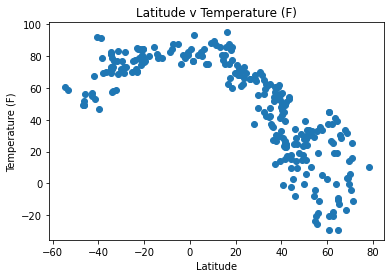

In [13]:
# Create Latitude vs. Temperature scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Temperature (F)"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Temperature (F) (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Temperature (F).png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded.
The data seems to suggest that that the temperature seems to increase as it gets closer to 0 and decrease at varrying rates the further it gets from 0. This relationship supports the initial hypothesis that it gets warmer the closer you are to the equator.

## Latitude vs. Humidity Plot

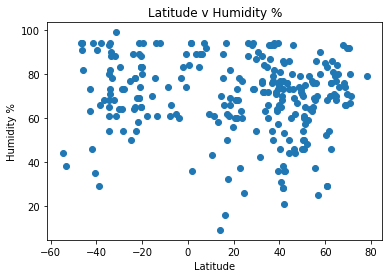

In [14]:
# Create Latitude vs. Humidity scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Humidity %"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Humidity % (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Humidity %.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded.
The data does not show a true correlation between the latitude and the percent humidity. While we do see the humidity values to trend lower at more extreme latitudes (-50, 50) the data is too dispersed in this chart to accurately say there is a strong correlation between the two

## Latitude vs. Cloudiness Plot

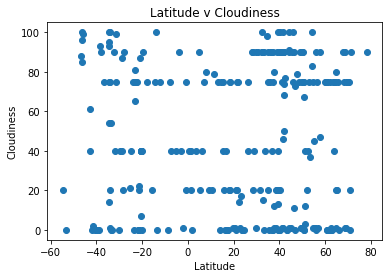

In [15]:
# Create Latitude vs. Cloudiness scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Cloud"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Cloudiness (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Cloudiness.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the Cloudiness value recorded.
The data seems to suggest that that there is little to no discernable coorilation between the level of cloudiness and the latitude, as the points are dispersed across the chart

## Latitude vs. Wind Speed Plot

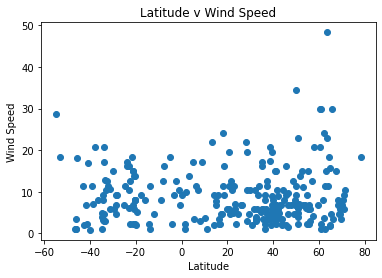

In [16]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(cleaned_data_df["Lat"], cleaned_data_df["Wind Speed"])

# Set the title and x and y labels of the plot
plt.title("Latitude v Wind Speed (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the plotted figure as .pngs
plt.savefig("Images/Latitude v Wind Speed.png")

# Best practice to use plt.show()
plt.show()

### This above plot shows the relationship between the change in latitude and how that potentially correlates to the wind speed value recorded.
This chart again depicts little correlation between latitude and wind speed as the data is spread across the whole chart, not being effected by the latitude value it is tied to.

## Linear Regression

In [17]:
# Create Northern and Southern hemisphere dataframes based on homework instructions
# Norther hemisphere is if lat >= 0 and Southern is if it is < 0
northern_hemisphere = cleaned_data_df.loc[cleaned_data_df["Lat"] >= 0]
southern_hemisphere = cleaned_data_df.loc[cleaned_data_df["Lat"] < 0]
northern_hemisphere.head()

,City,Country,Temperature (F),Date,Humidity %,Cloud,Wind Speed,Lat,Lng
1,San Patricio,US,37.13,1613154173,93,90,21.85,28.0170,-97.5169
4,Kapaa,US,68.43,1613153967,68,75,10.36,22.0752,-159.3190
5,Nikolskoye,RU,2.52,1613154188,85,75,6.71,59.7035,30.7861
6,Haines Junction,CA,-29.20,1613154190,68,0,1.14,60.7522,-137.5108
9,Jamestown,US,23.13,1613154097,53,90,5.75,42.0970,-79.2353


In [18]:
# Generate x and y values to start
# These will be updated for each chart, but the rest of the setup will stay
x_values = cleaned_data_df["Lat"]
y_values = cleaned_data_df["Temperature (F)"]

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

# Create a line equation using the linregress values generated above
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

0      86.432662
1      43.999355
2      89.505156
3      84.129335
4      47.818393
         ...    
274    17.976445
275    87.095327
276    20.753664
277    37.914976
278    35.798302
Name: Lat, Length: 266, dtype: float64
y = -0.64x + 62.01


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6824480468514366


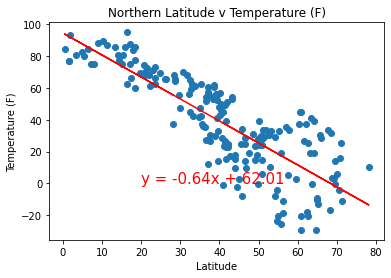

In [19]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature (F)"]

# Generate the scatter plot
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Temperature (F) (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(20,0), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Temperature (F).png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The regression line clearly shows the hypothesis to be true as the temperature drops the further the latitude is from 0 (the equator). Also, the r value being pretty close to 1.0 each time I've run this with new random cities gives me confidence that the correlation between these values is strong.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.41537824660124956


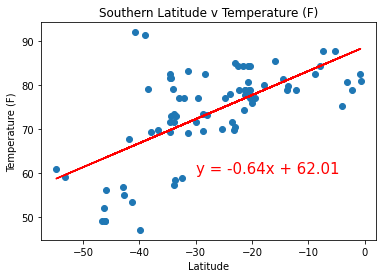

In [20]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature (F)"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Temperature (F) (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-30,60), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Temperature (F).png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The regression line again clearly shows the hypothesis to be true as the temperature rises the closer the latitude gets to 0 (the equator). Also, the r value again is on the 'higher' side as it closer to 1.0, shows that the correlation between these values is strong.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 9.088548370345133e-06


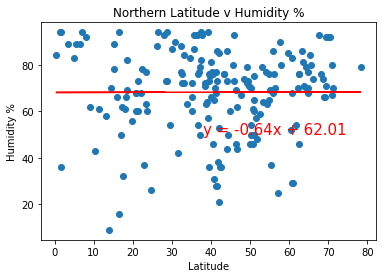

In [21]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity %"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Humidity % (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(38, 50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Humidity %.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded. It also shows a regression line to further display any correlation.
The regression leads me to believe that there is very little correlation between the latitude and the percent humidity. A low r value is a telling sign of this.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007527605035458448


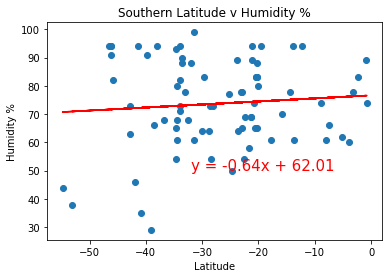

In [22]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity %"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Humidity % (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-32,50), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Humidity %.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the percent humidity value recorded. It also shows a regression line to further display any correlation.
While there is a stronger correlation between the latitude and humidity in the southern hemisphere data gathered, the low r value and slope of the regression line indicate that this is still a weak correlation.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008293120333981571


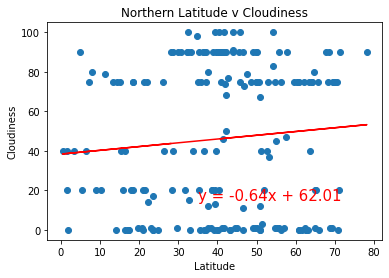

In [23]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Cloud"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Cloudiness (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(35,15), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Cloudiness.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the cloudiness value recorded. It also shows a regression line to further display any correlation.
There is a positive correlation displayed here, however it is a weak correlation. Leading to the conclusion that the cloudiness and latitude values do not necessarily effect one another.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.006671856220479146


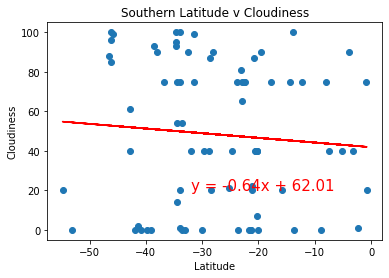

In [24]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Cloud"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Cloudiness (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-32,20), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Cloudiness.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
There is a negative correlation displayed here, however it is a weak correlation. Leading to the conclusion that the cloudiness and latitude values do not necessarily effect one another.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.015685853183676633


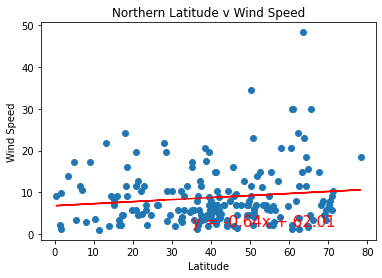

In [25]:
# Update the x and y values
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Wind Speed"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Latitude v Wind Speed (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(35,2), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Northern Latitude v Wind Speed.png")

# Show plot
plt.show()

### This above plot for the northern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the wind speed value recorded. It also shows a regression line to further display any correlation.
The chart and regression line show that in the northern hemisphere there is a weak, yet slightly positive correlation between the wind speed recorded and the latitude. The r value being very close to 0 is also telling that this correlation is very minimal.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0004530674509430032


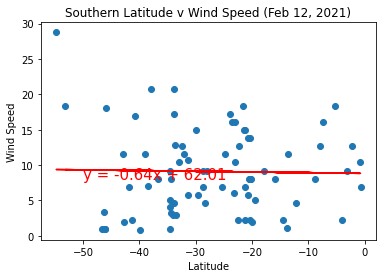

In [27]:
# Update the x and y values
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Wind Speed"]

# Generate the scatter plot and regression line
plt.scatter(x_values,y_values)

# Set up linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# Get regression values
regress_values = x_values * slope + intercept
#print(regress_values)

# Generate regression values
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Latitude v Wind Speed (Feb 12, 2021)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
# Update the coordinates here to make sure the chart displays properly
plt.annotate(line_eq,(-50, 8), fontsize=15, color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Save the plotted figure as .pngs
plt.savefig("Images/Southern Latitude v Wind Speed.png")

# Show plot
plt.show()

### This above plot for the southern hemisphere shows the relationship between the change in latitude and how that potentially correlates to the temperature value recorded. It also shows a regression line to further display any correlation.
The chart and regression line show that in the southern hemisphere there is a weak, yet slightly negative correlation between the wind speed recorded and the latitude. The r value being very close to 0 is also telling that this correlation is very minimal.